# LJ, $\ln \Pi$

In [1]:
import sys, os

import glob
import numpy as np
import xarray as xr

import joblib

import lnpy
import thermoextrap

import matplotlib.pyplot as plt

from thermoextrap.gpr_active import active_utils

## Preliminaries

In [2]:
base_dir = "SRS_data"
raw_dat = np.loadtxt("SRS_data/SRS_LJ_VLE_data.txt")
raw_beta = 1.0 / raw_dat[::-1, 0]
raw_psat = raw_dat[::-1, 5]
raw_dens = raw_dat[::-1, [1, 3]]
raw_lnz = raw_dat[::-1, -2]

In [3]:
from run_LJ_lnPi import *

## Macrostate extrapolation

Here using data we generated independently, but in the same way, as the SRS data, but saving derivative information up to 5th order for comparison, as described in Fig. S4 of the SI. Make sure to switch the line in run_LJ_lnPi.py to indicate which the data set you want to use.

In [4]:
ref_T = [0.7, 1.2]

ref_mu = np.average([get_sim_activity(t) * t for t in ref_T])
print(ref_mu)

-3.9875


Order 1
Metal device set to: Apple M2


2023-02-02 13:12:14.594012: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-02 13:12:14.594101: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[array(0.53215747), array(2.1558514), array(4.40186173)]
[0.5321574687073866, 2.1558514025299162, 4.401861733650581]
[[0.00000000e+00 6.29638507e-03 7.39393816e-03 ... 6.81536203e+00
  7.39825239e+00 5.46619786e+00]
 [0.00000000e+00 1.65074220e-02 3.35258141e-02 ... 4.26219549e+01
  4.08122530e+01 4.79288240e+01]
 [0.00000000e+00 3.34930150e-02 6.91508525e-02 ... 6.50496389e+01
  5.98357375e+01 6.97957972e+01]
 [0.00000000e+00 3.15200526e-02 6.74602918e-02 ... 6.40920260e+01
  5.76320272e+01 6.55201996e+01]
 [0.00000000e+00 1.60397373e-02 3.55296994e-02 ... 3.17211580e+01
  2.84339108e+01 2.96700574e+01]
 [0.00000000e+00 1.53450511e-02 2.98023329e-02 ... 1.05056832e+01
  1.02279596e+01 9.29670019e+00]]
RMSD: 0.793227
Mean Std: 1.667744
RMSD: 9.481647
Mean Std: 8.611036
RMSD: 11.803568
Mean Std: 12.246671
RMSD: 11.171385
Mean Std: 11.535446
RMSD: 6.065560
Mean Std: 5.505274
RMSD: 0.522686
Mean Std: 1.071728


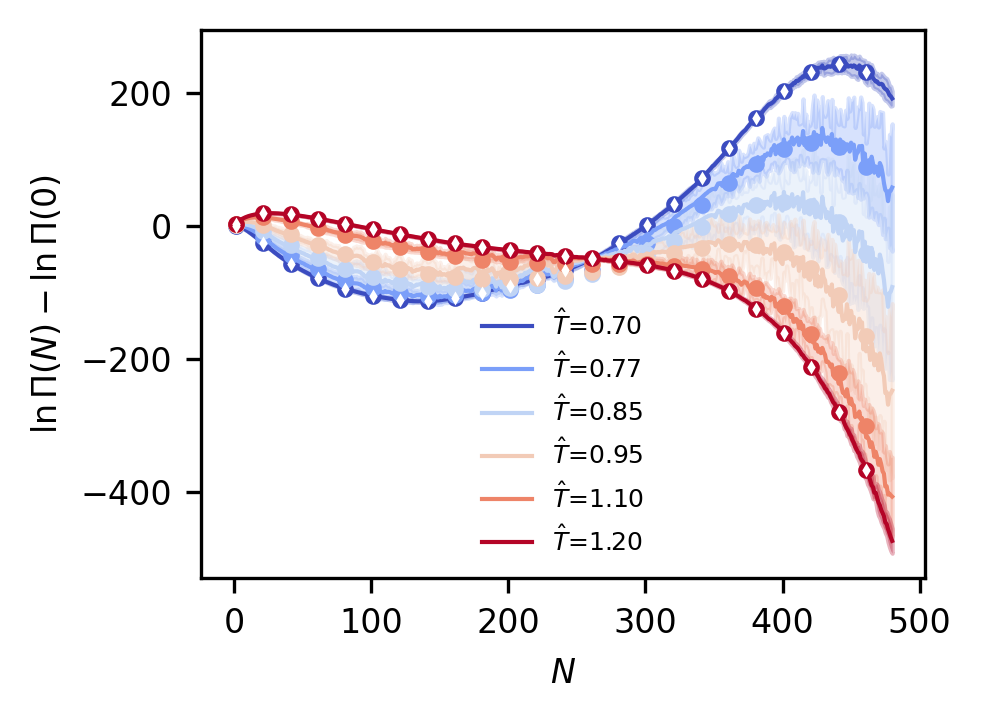

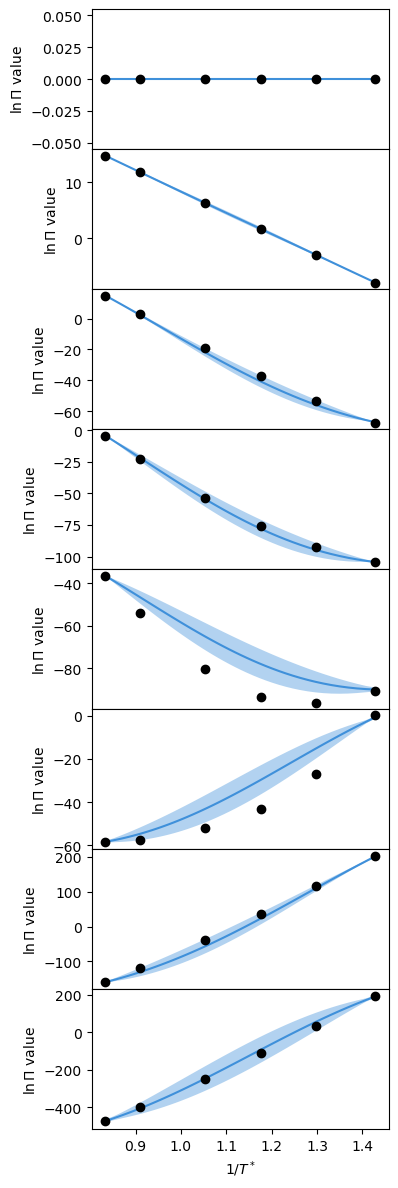

Order 2
[array(0.30270821), array(6.74652792), array(3.21995287)]
[0.30270821226588135, 6.746527923905065, 3.2199528741373173]
[[0.00000000e+00 1.93118082e-03 2.26823591e-03 ... 1.56901779e+00
  2.13098229e+00 1.22553452e+00]
 [0.00000000e+00 2.75783637e-02 5.48349319e-02 ... 4.63587713e+01
  5.42737283e+01 5.68549250e+01]
 [0.00000000e+00 8.97261791e-02 1.78633465e-01 ... 1.05687969e+02
  1.24969145e+02 1.28382358e+02]
 [0.00000000e+00 7.64607899e-02 1.52326065e-01 ... 9.81502261e+01
  1.14208944e+02 1.15936352e+02]
 [0.00000000e+00 8.38443722e-03 1.68908733e-02 ... 2.14362384e+01
  2.36881297e+01 2.38858021e+01]
 [0.00000000e+00 4.70802564e-03 9.14590577e-03 ... 3.21020827e+00
  2.95167005e+00 2.00851921e+00]]
RMSD: 0.197166
Mean Std: 0.502866
RMSD: 3.395600
Mean Std: 11.851947
RMSD: 4.933257
Mean Std: 26.449958
RMSD: 5.026842
Mean Std: 23.942110
RMSD: 1.615923
Mean Std: 4.871601
RMSD: 0.088713
Mean Std: 0.299105


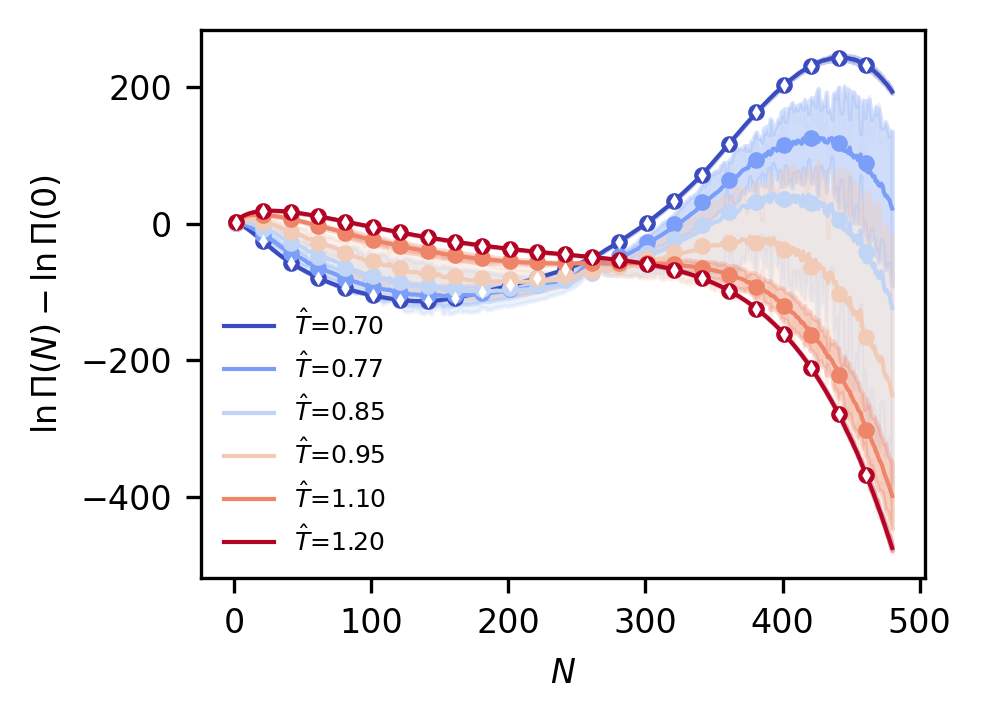

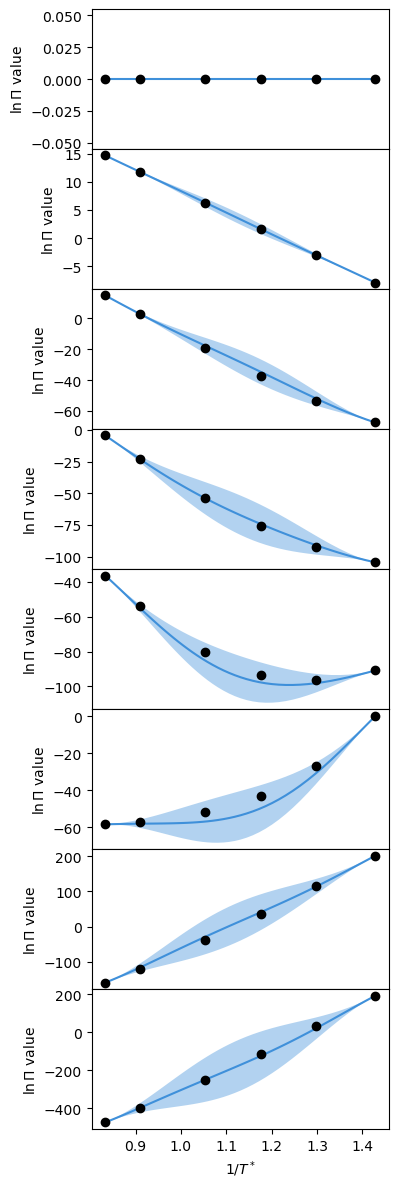

Order 3
[array(0.81423642), array(1522.72776683), array(1.22570756)]
[0.8142364222801226, 1522.7277928204423, 1.2257075564389275]
[[0.00000000e+00 2.62220531e-04 3.08446049e-04 ... 2.67215760e-01
  2.53116178e-01 2.67773648e-01]
 [0.00000000e+00 2.53104898e-04 3.10629555e-04 ... 3.82170404e-01
  4.18997473e-01 5.66196803e-01]
 [0.00000000e+00 2.83761669e-04 4.88668148e-04 ... 9.86542748e-01
  1.12738795e+00 1.17764513e+00]
 [0.00000000e+00 4.94109130e-04 9.64424228e-04 ... 9.29839175e-01
  1.14590833e+00 1.08611304e+00]
 [0.00000000e+00 6.27393731e-04 1.22300448e-03 ... 4.08568207e-01
  4.94616572e-01 4.69071334e-01]
 [0.00000000e+00 6.31390479e-04 1.22684616e-03 ... 3.43413354e-01
  3.77958197e-01 3.25168897e-01]]
RMSD: 0.024439
Mean Std: 0.067931
RMSD: 0.228417
Mean Std: 0.122751
RMSD: 0.534139
Mean Std: 0.254555
RMSD: 0.394505
Mean Std: 0.217264
RMSD: 0.039049
Mean Std: 0.056860
RMSD: 0.008458
Mean Std: 0.040965


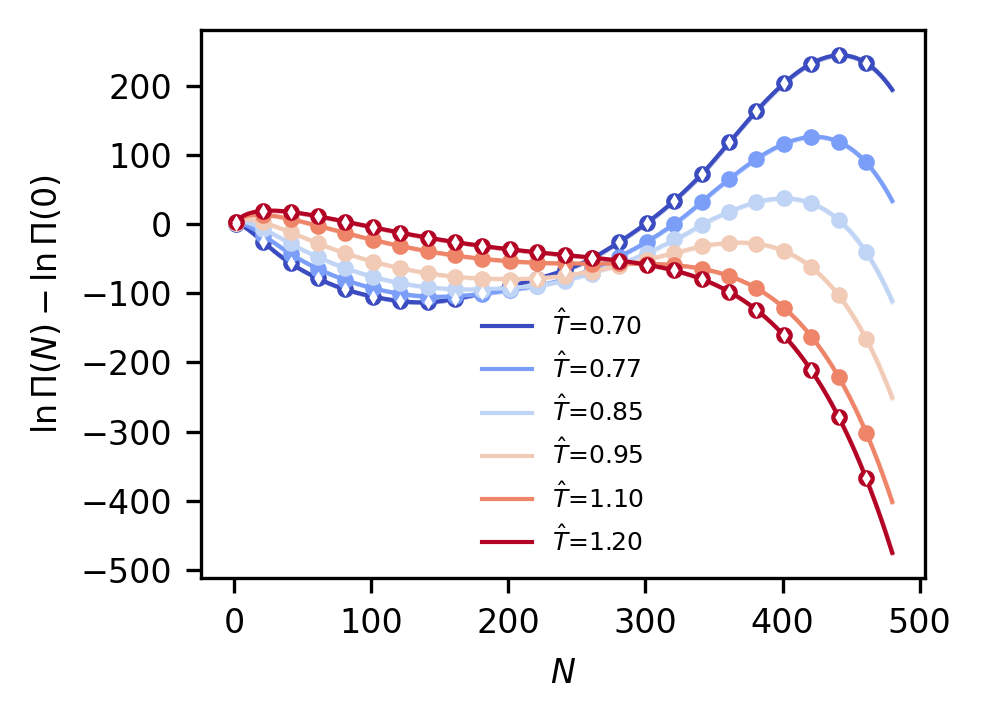

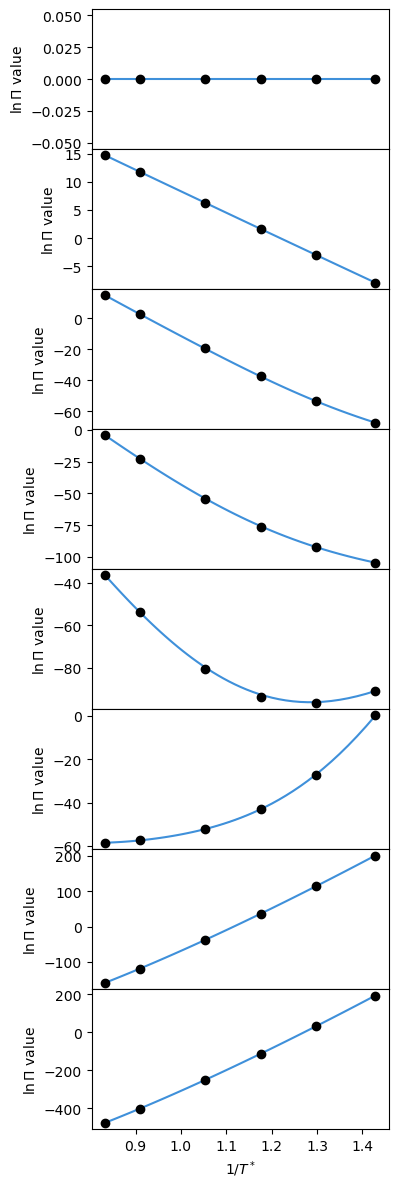

Order 4


2023-02-02 13:13:15.014458: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2023-02-02 13:13:15.014474: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2023-02-02 13:13:15.014505: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2023-02-02 13:13:15.014512: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2023-02-02 13:13:15.014518: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular out

[array(0.70626794), array(1522.72770952), array(1.02767871)]
[0.7062688376109579, 1522.727689755417, 1.0276733743316084]
[[0.00000000e+00 2.02000795e-04 2.46491323e-04 ... 2.40360078e-01
  7.35150378e-02 1.97819248e-01]
 [0.00000000e+00 2.01155249e-04 2.52094258e-04 ... 2.74270994e-01
  2.71360308e-01 4.39515576e-01]
 [0.00000000e+00 2.03086467e-04 2.79388898e-04 ... 5.57365026e-01
  6.70804504e-01 9.67216192e-01]
 [0.00000000e+00 2.45791536e-04 4.09657499e-04 ... 6.15140848e-01
  7.22088110e-01 8.56745543e-01]
 [0.00000000e+00 2.73673476e-04 4.80654142e-04 ... 2.33378249e-01
  3.96543508e-01 2.45079338e-01]
 [0.00000000e+00 2.74057412e-04 4.83407137e-04 ... 1.66090881e-01
  3.18461280e-01 1.86381906e-01]]
RMSD: 0.031457
Mean Std: 0.046488
RMSD: 0.160205
Mean Std: 0.070170
RMSD: 0.358640
Mean Std: 0.155984
RMSD: 0.239094
Mean Std: 0.140753
RMSD: 0.023997
Mean Std: 0.034273
RMSD: 0.012430
Mean Std: 0.026375


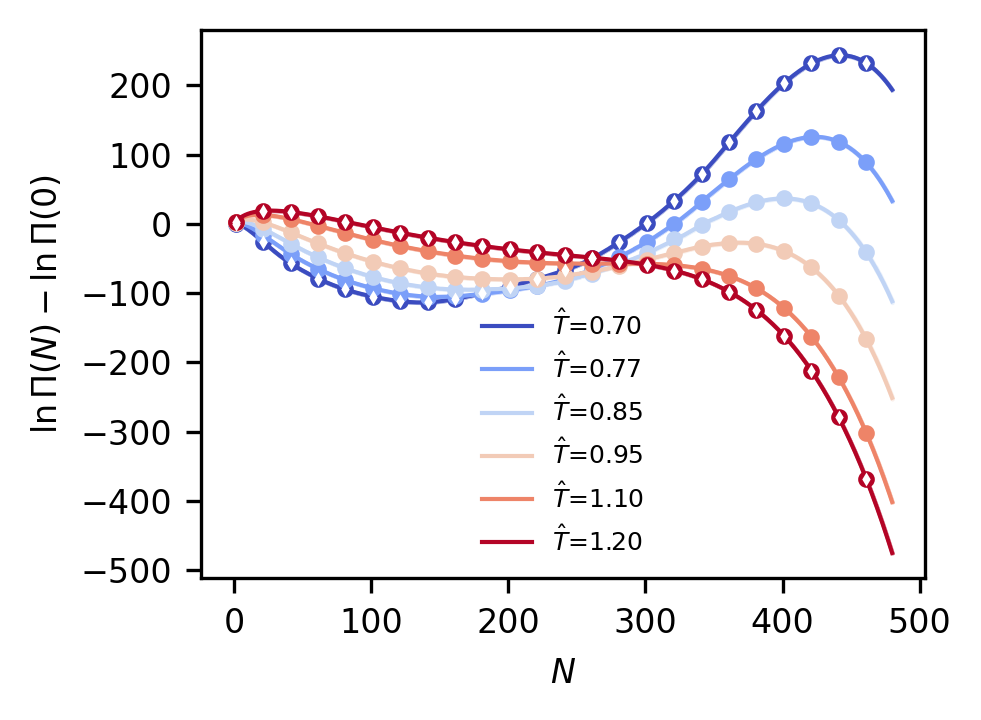

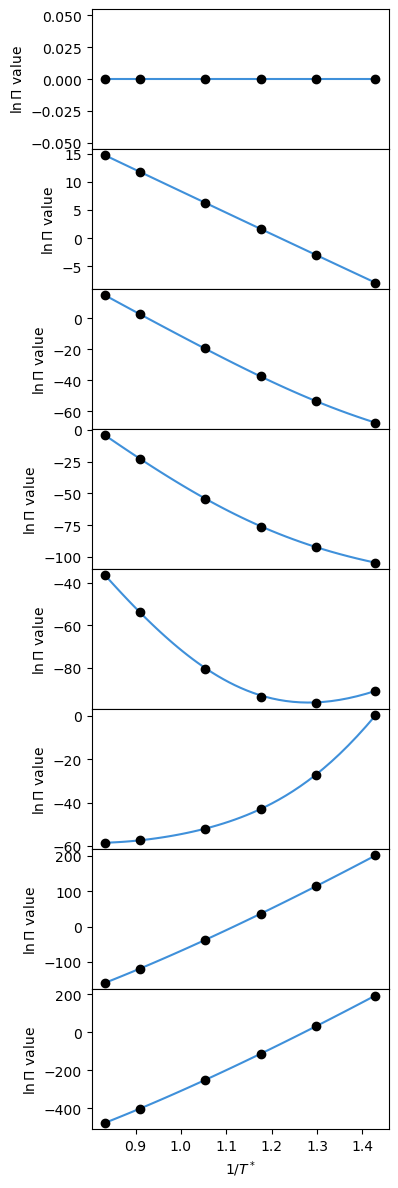

Order 5


2023-02-02 13:14:03.141679: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2023-02-02 13:14:03.141699: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2023-02-02 13:14:03.141702: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2023-02-02 13:14:03.141704: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2023-02-02 13:14:03.141709: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular out

[array(0.55607993), array(1522.72729242), array(0.81952323)]
[0.5561061887315156, 1522.7275229276752, 0.8195078207992692]
[[0.00000000e+00 1.62263956e-04 1.99310338e-04 ... 8.48145375e-02
  1.11091432e-01 2.71085731e-02]
 [0.00000000e+00 1.62208714e-04 2.03559563e-04 ... 8.07121897e-02
  2.71758049e-01 2.23015189e-01]
 [0.00000000e+00 1.62303403e-04 2.09166706e-04 ... 4.25791582e-01
  4.98948716e-01 7.27995917e-01]
 [0.00000000e+00 1.67308383e-04 2.28883132e-04 ... 4.60104987e-01
  2.67604598e-01 7.81670681e-01]
 [0.00000000e+00 1.70367246e-04 2.41289407e-04 ... 2.06289035e-01
  1.91244557e-01 1.74248732e-01]
 [0.00000000e+00 1.70383215e-04 2.43746913e-04 ... 1.49053542e-01
  2.08138393e-01 1.19373009e-01]]
RMSD: 0.026148
Mean Std: 0.029057
RMSD: 0.112526
Mean Std: 0.045737
RMSD: 0.296561
Mean Std: 0.111862
RMSD: 0.188855
Mean Std: 0.096874
RMSD: 0.015959
Mean Std: 0.022653
RMSD: 0.010698
Mean Std: 0.017987


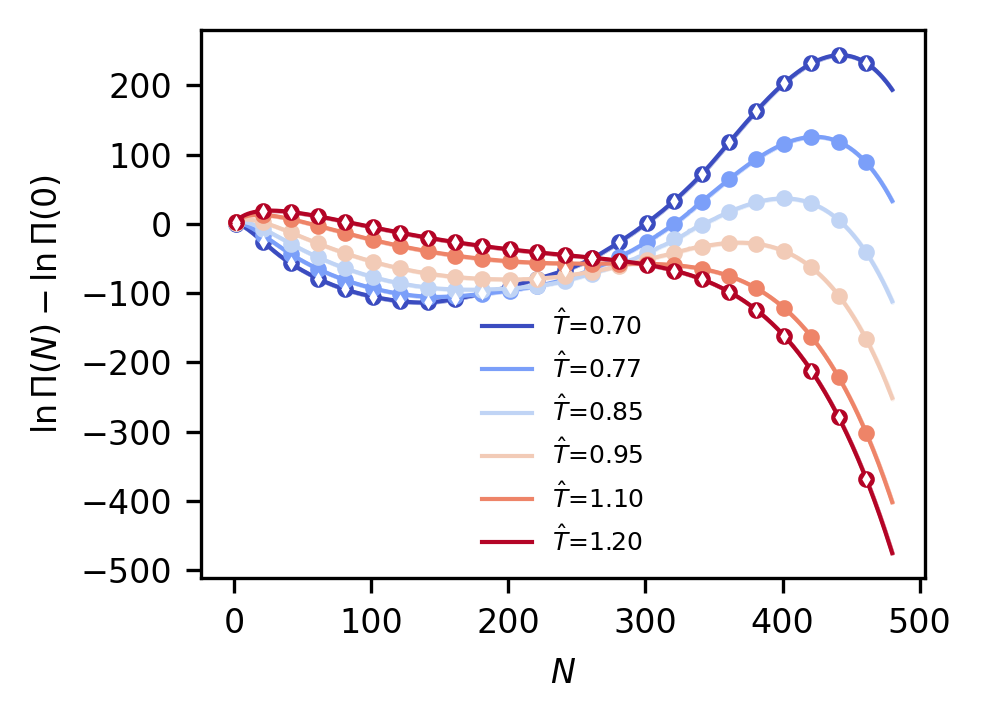

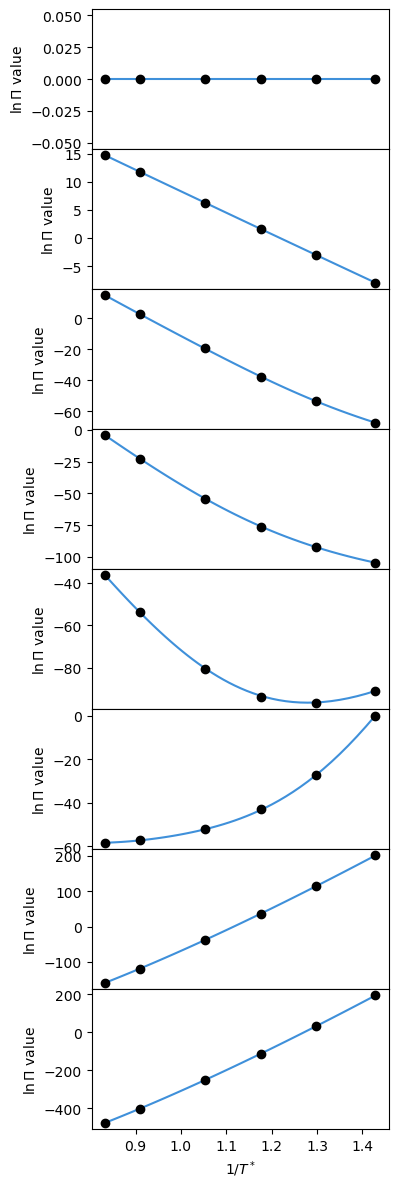

In [5]:
curr_params = [1.0, 1.0, 10.0]

for d_order in range(1, 6):
    print("Order %i" % d_order)

    lnpi_info = [load_lnPi_info(t, ref_mu=ref_mu) for t in ref_T]
    state_list = [state_from_info_dict(i, d_o=d_order) for i in lnpi_info]

    gp_model = active_utils.create_GPR(state_list, start_params=curr_params)

    curr_params = [p.numpy() for p in gp_model.trainable_parameters]
    print(curr_params)

    check_params = np.load(
        os.path.expanduser(
            "~/GPR_Extrapolation/LJ_EOS/lnPi/new_vary_order/gp_model_info_order%i.npz"
            % d_order
        )
    )["params"].tolist()
    print(check_params)

    # Plotting - predictions with GP model
    test_T = np.array([0.70, 0.77, 0.85, 0.95, 1.10, 1.20])
    test_beta = 1.0 / test_T

    gp_mu, gp_var = gp_model.predict_f(
        np.vstack([test_beta, np.zeros_like(test_beta)]).T
    )
    gp_mu = gp_mu.numpy()
    gp_var = gp_var.numpy()
    gp_std = np.sqrt(gp_var)

    # Add N=0 bin back in
    gp_mu = np.concatenate([np.zeros((gp_mu.shape[0], 1)), gp_mu], axis=-1)
    gp_var = np.concatenate([np.zeros((gp_var.shape[0], 1)), gp_var], axis=-1)
    gp_std = np.concatenate([np.zeros((gp_std.shape[0], 1)), gp_std], axis=-1)
    print(gp_std)

    N_vals = np.arange(gp_mu.shape[1])

    tColors = plt.cm.coolwarm(np.linspace(0.0, 1.0, len(test_T)))

    fig, ax = plt.subplots(figsize=(3.37, 2.5), dpi=300)

    for i in range(len(test_T)):
        this_pred = gp_mu[i, :]
        ax.fill_between(
            N_vals,
            this_pred - 2.0 * gp_std[i, :],
            this_pred + 2.0 * gp_std[i, :],
            color=tColors[i],
            alpha=0.3,
        )
        ax.plot(
            N_vals,
            this_pred,
            linewidth=1.0,
            color=tColors[i],
            label=r"$\hat{T}$=%1.2f" % test_T[i],
        )

        this_true = np.average(load_lnPi_info(test_T[i], ref_mu=ref_mu)["lnPi"], axis=0)
        ax.plot(N_vals[1::20], this_true[1::20], "o", color=tColors[i], ms=3.0)
        this_RMSD = np.sqrt(np.average((this_pred - this_true) ** 2))
        this_meanStd = np.average(gp_std[i, :])
        print("RMSD: %f" % this_RMSD)
        print("Mean Std: %f" % this_meanStd)

    max_order = int(np.max(gp_model.data[0][:, 1]))
    for i in range(len(ref_T)):
        this_ref = gp_model.data[1][i * (max_order + 1), :] * gp_model.scale_fac
        ax.plot(N_vals[1::20], this_ref[::20], "dw", ms=1.0)

    ax.tick_params(axis="both", labelsize=8)

    ax.legend(fontsize=6, frameon=False)

    ax.set_xlabel(r"$N$", fontsize=8)
    ax.set_ylabel(r"$\ln \Pi (N) - \ln \Pi (0)$", fontsize=8)

    fig.tight_layout()

    # Plotting - along individual bins
    extra_T = np.linspace(0.7, 1.2, 50)
    extra_betas = 1.0 / extra_T

    extra_mu, extra_var = gp_model.predict_f(
        np.vstack([extra_betas, np.zeros_like(extra_betas)]).T
    )
    extra_mu = extra_mu.numpy()
    extra_var = extra_var.numpy()
    extra_std = np.sqrt(extra_var)

    # Add N=0 bin back in
    extra_mu = np.concatenate([np.zeros((extra_mu.shape[0], 1)), extra_mu], axis=-1)
    extra_var = np.concatenate([np.zeros((extra_var.shape[0], 1)), extra_var], axis=-1)
    extra_std = np.concatenate([np.zeros((extra_std.shape[0], 1)), extra_std], axis=-1)

    check_inds = [0, 10, 50, 100, 200, 300, 400, -1]

    true_lnPis = np.array(
        [np.average(load_lnPi_info(t, ref_mu=ref_mu)["lnPi"], axis=0) for t in test_T]
    )

    single_fig, single_ax = plt.subplots(
        len(check_inds), figsize=(4.0, 1.5 * len(check_inds)), sharex=True
    )

    for i, ind in enumerate(check_inds):
        single_ax[i].plot(extra_betas, extra_mu[:, ind])
        single_ax[i].fill_between(
            extra_betas,
            extra_mu[:, ind] - extra_std[:, ind],
            extra_mu[:, ind] + extra_std[:, ind],
            alpha=0.4,
        )
        single_ax[i].plot(test_beta, true_lnPis[:, ind], "ko")

        single_ax[i].set_xlabel(r"$1/T^*$")
        single_ax[i].set_ylabel(r"$\ln \Pi$ value")

    single_fig.tight_layout()
    single_fig.subplots_adjust(hspace=0.0)

    plt.show()

In [6]:
gp_model

name,class,transform,prior,trainable,shape,dtype,value
HeteroscedasticGPR.kernel.kernel.var,Parameter,Softplus,,True,(),float64,1522.73
HeteroscedasticGPR.kernel.kernel.l,Parameter,Softplus,,True,(),float64,0.55608
HeteroscedasticGPR.likelihood.power_scale,Parameter,Softplus,,True,(),float64,0.819523
HeteroscedasticGPR.likelihood.power_add,Parameter,Identity,,False,(),float64,0


In [7]:
gp_model.likelihood.cov[-1]

array([[ 5.61275226e-08,  6.25255423e-08,  1.09392852e-06,
         1.99416798e-06,  1.58509553e-03, -4.99542546e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.25255423e-08,  1.78441351e-07,  1.69072992e-06,
         2.55831062e-05,  4.77921633e-03, -6.67989652e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.09392852e-06,  1.69072992e-06,  3.10805950e-05,
         9.77651789e-05,  7.37936221e-02, -1.00369292e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.99416798e-06,  2.55831062e-05,  9.77651789e-05,
         5.32165540e-03,  5.39131408e-01, -4.27016800e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.58509553e-03,  4.77921633e-03,  7.3793622

## Saturation Properties

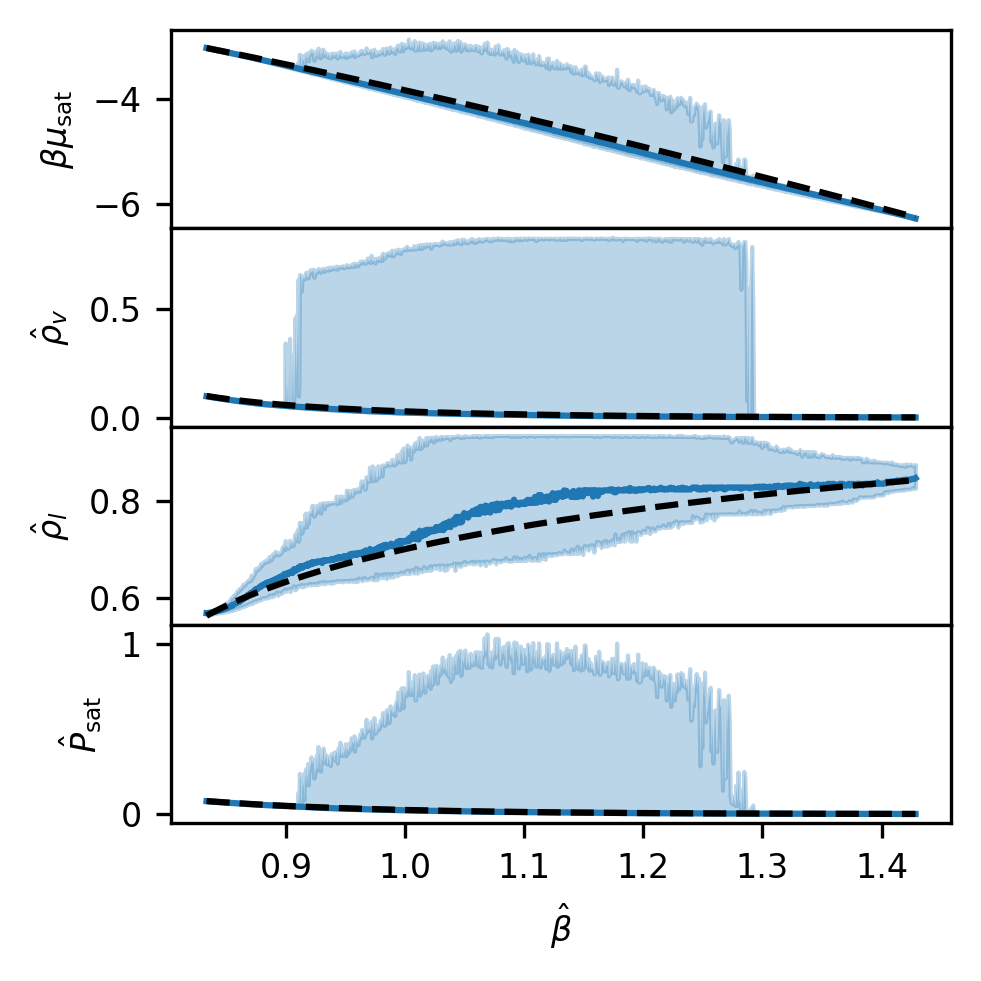

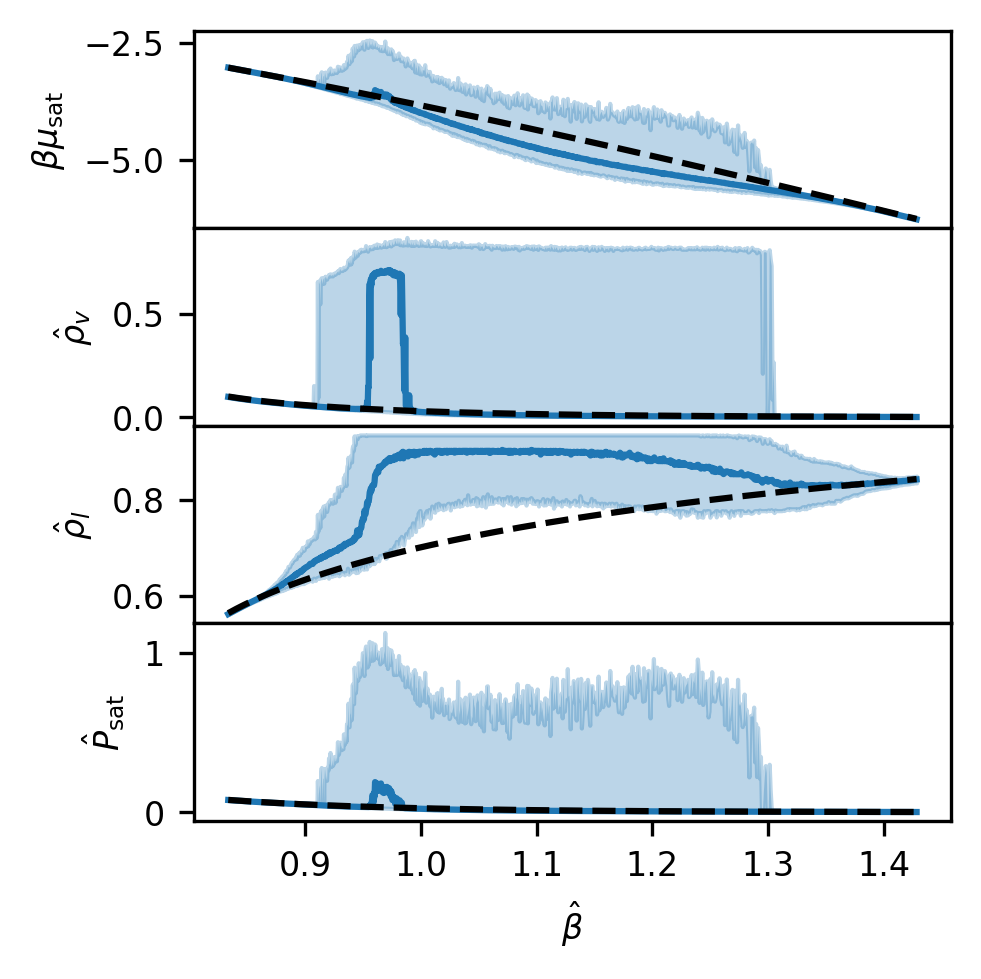

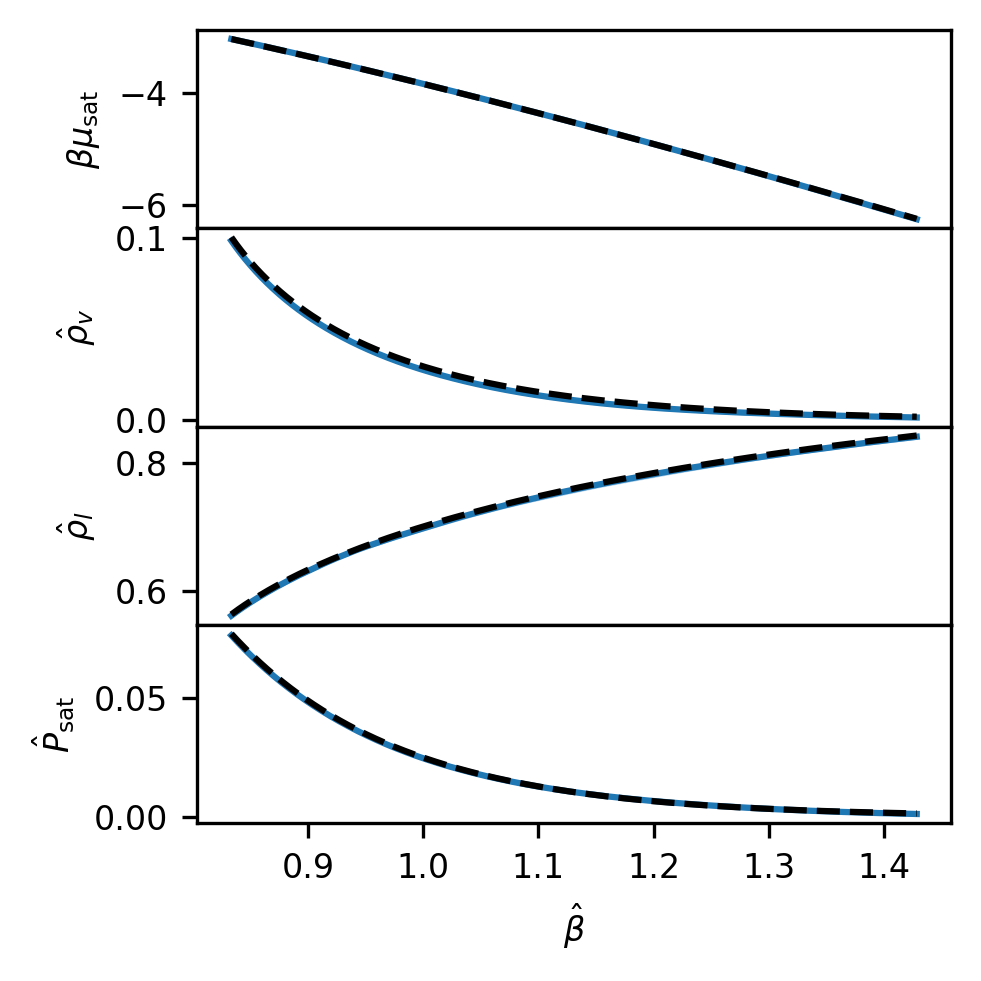

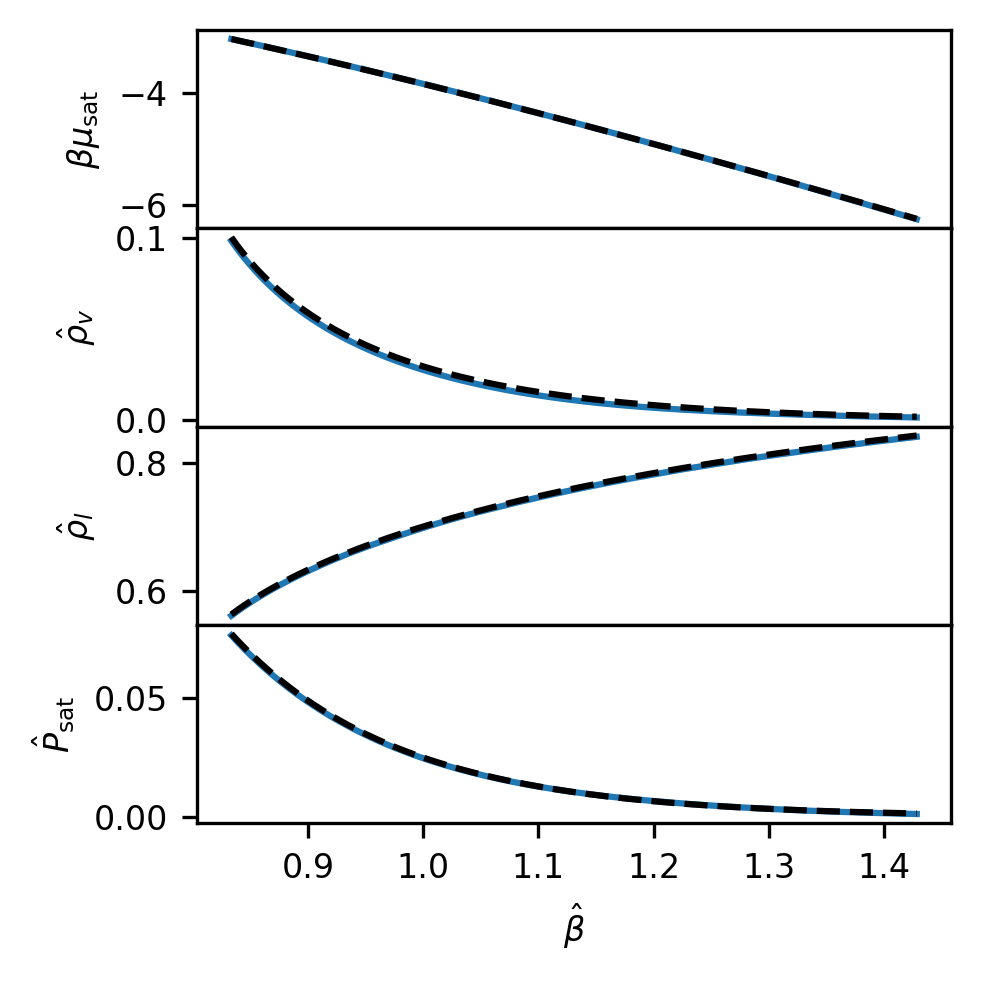

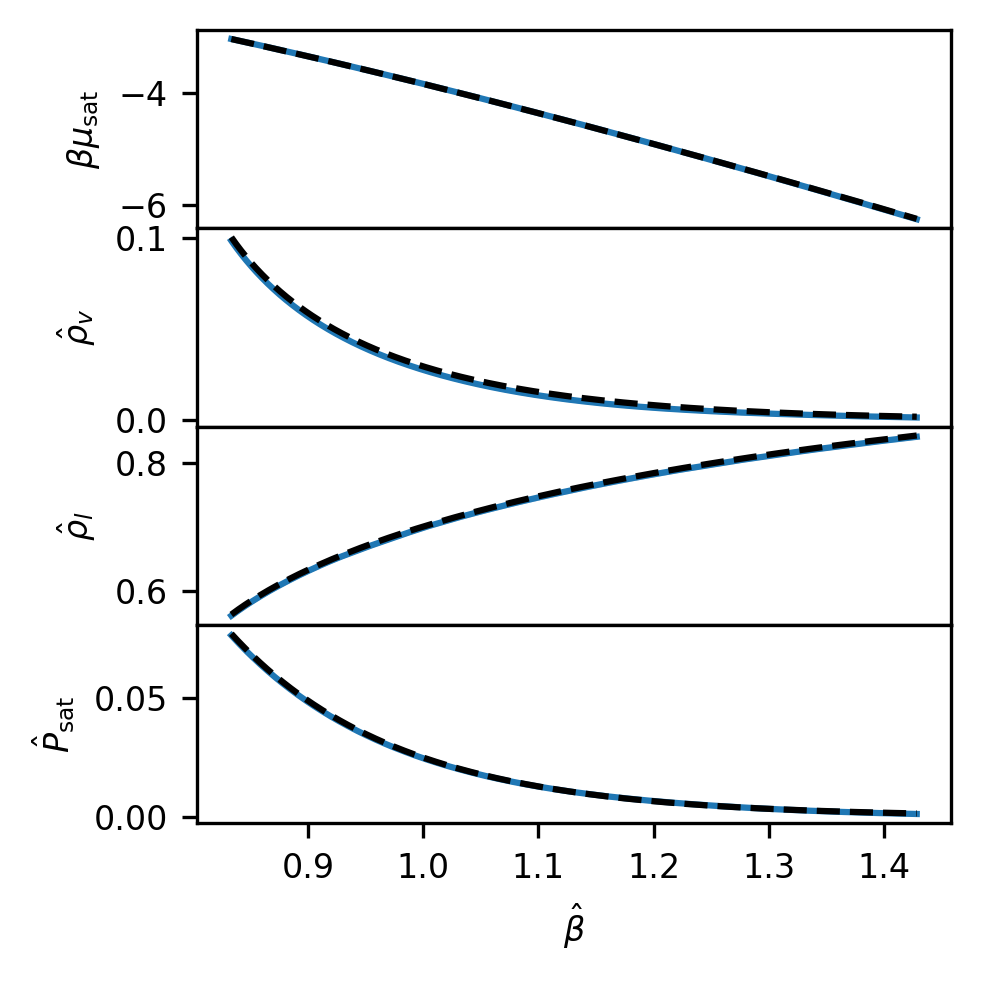

In [8]:
# Loop over orders
for d_order in range(1, 6):
    # Load saturation properties
    # Should be lnz, density_gas, density_liquid, pressure_gas, pressure_liquid
    sat_props = np.load(
        os.path.expanduser(
            "~/GPR_Extrapolation/LJ_EOS/lnPi/new_vary_order/sat_props_GPR_order%i.npz"
            % d_order
        )
    )
    gp_sat_props = sat_props["props"]
    gp_sat_props_conf_ints = sat_props["conf_ints"]

    # Plot true values versus predicted properties
    prop_betas = 1.0 / np.linspace(0.7, 1.2, 1000)

    fig, ax = plt.subplots(
        gp_sat_props.shape[1] - 1,
        sharex=True,
        sharey=False,
        figsize=(3.37, 3.37),
        dpi=300,
    )

    for i, prop in enumerate([raw_lnz, raw_dens[:, 0], raw_dens[:, 1], raw_psat]):
        ax[i].plot(prop_betas, gp_sat_props[:, i], color="tab:blue")
        ax[i].fill_between(
            prop_betas,
            gp_sat_props_conf_ints[:, 0, i],
            gp_sat_props_conf_ints[:, 1, i],
            color="tab:blue",
            alpha=0.3,
        )
        ax[i].plot(raw_beta, prop, "k--")
        ax[i].tick_params(axis="both", labelsize=8)

    ax[-1].set_xlabel(r"$\hat{\beta}$", fontsize=8)
    ax[0].set_ylabel(r"$\beta \mu_\mathrm{sat}$", fontsize=8)
    ax[1].set_ylabel(r"$\hat{\rho}_v$", fontsize=8)
    ax[2].set_ylabel(r"$\hat{\rho}_l$", fontsize=8)
    ax[3].set_ylabel(r"$\hat{P}_\mathrm{sat}$", fontsize=8)

    fig.tight_layout()
    fig.subplots_adjust(hspace=0.0)

    plt.show()

# With actual SRS data
Seems like the 2nd order data at 0.7 and 1.2 is better converged from the SRS.
Make sure to switch the line in run_LJ_lnPi.py to change which data is used.

In [4]:
ref_T = [0.7, 1.2]

ref_mu = np.average([get_sim_activity(t) * t for t in ref_T])
print(ref_mu)

-3.9875


[array(0.49665632), array(5.54628312), array(3.40187858)]
[0.49665632032987095, 5.546283121128071, 3.4018785799614215]
[[0.00000000e+00 3.20814310e-03 5.93127063e-03 ... 4.71882413e+00
  3.79903843e+00 4.45628673e+00]
 [0.00000000e+00 3.18449603e-03 5.89362151e-03 ... 6.87060369e+00
  4.71986011e+00 8.46986867e+00]
 [0.00000000e+00 5.12719640e-03 1.12988641e-02 ... 2.08871243e+01
  2.24226007e+01 2.37676545e+01]
 [0.00000000e+00 5.03340538e-03 1.33529536e-02 ... 1.92465407e+01
  2.19161096e+01 2.17856708e+01]
 [0.00000000e+00 4.23297820e-03 9.17551312e-03 ... 5.73004630e+00
  8.17561090e+00 8.16142747e+00]
 [0.00000000e+00 4.27873019e-03 8.36602007e-03 ... 1.12680400e+00
  1.18229816e+00 7.35317678e-01]]
RMSD: 0.425859
Mean Std: 0.648855
RMSD: 2.128797
Mean Std: 1.994705
RMSD: 4.317245
Mean Std: 5.930401
RMSD: 3.520010
Mean Std: 5.346641
RMSD: 1.301111
Mean Std: 1.750731
RMSD: 0.086516
Mean Std: 0.251495


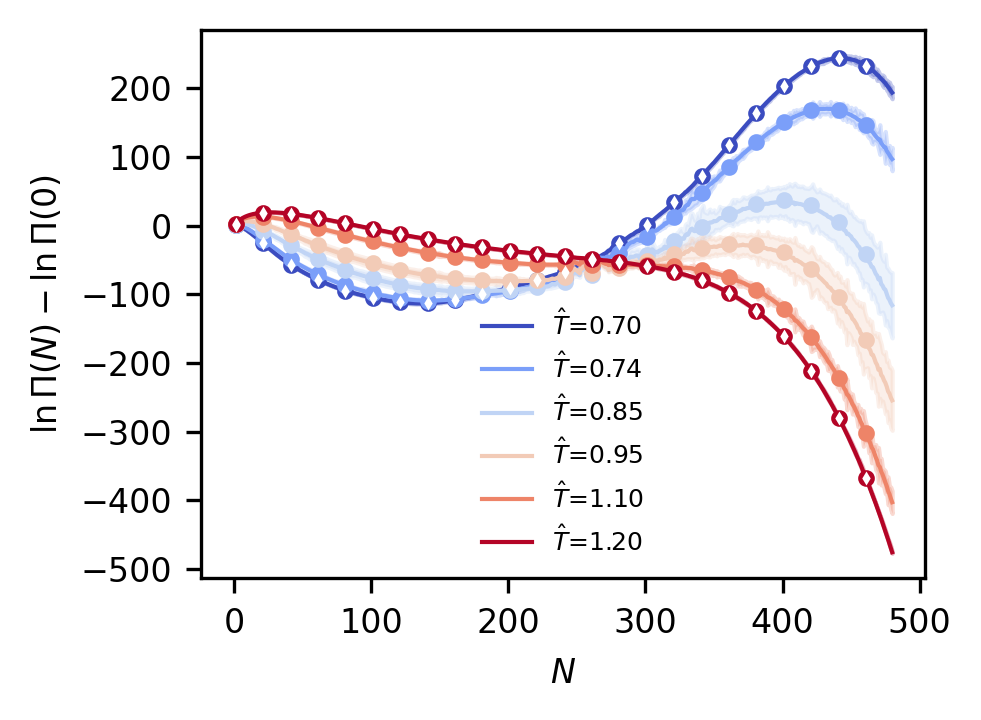

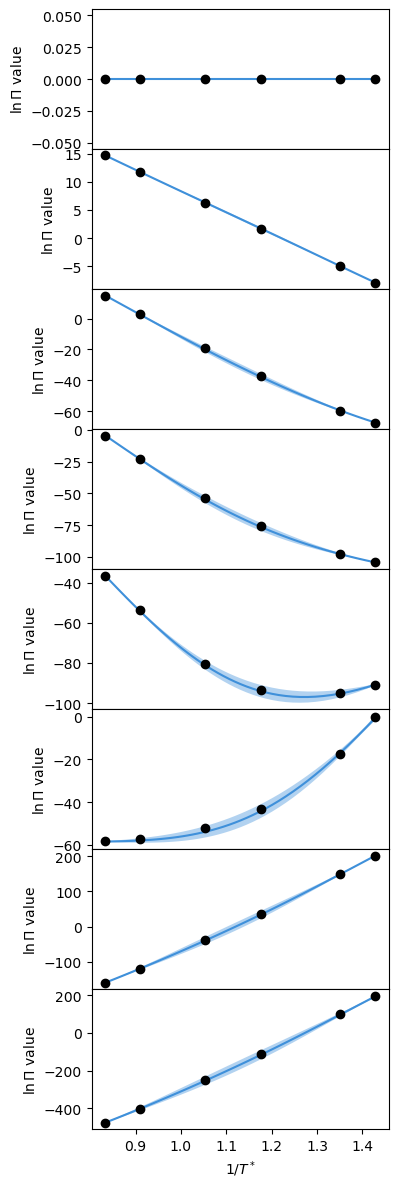

In [6]:
curr_params = [1.0, 1.0, 10.0]

lnpi_info = [load_lnPi_info(t, ref_mu=ref_mu) for t in ref_T]
state_list = [state_from_info_dict(i) for i in lnpi_info]

gp_model = active_utils.create_GPR(state_list, start_params=curr_params)

curr_params = [p.numpy() for p in gp_model.trainable_parameters]
print(curr_params)

check_params = np.load(
    os.path.expanduser("~/GPR_Extrapolation/LJ_EOS/lnPi/gp_model_info.npz")
)["params"].tolist()
print(check_params)

# Plotting - predictions with GP model
test_T = np.array([0.70, 0.74, 0.85, 0.95, 1.10, 1.20])
test_beta = 1.0 / test_T

gp_mu, gp_var = gp_model.predict_f(np.vstack([test_beta, np.zeros_like(test_beta)]).T)
gp_mu = gp_mu.numpy()
gp_var = gp_var.numpy()
gp_std = np.sqrt(gp_var)

# Add N=0 bin back in
gp_mu = np.concatenate([np.zeros((gp_mu.shape[0], 1)), gp_mu], axis=-1)
gp_var = np.concatenate([np.zeros((gp_var.shape[0], 1)), gp_var], axis=-1)
gp_std = np.concatenate([np.zeros((gp_std.shape[0], 1)), gp_std], axis=-1)
print(gp_std)

N_vals = np.arange(gp_mu.shape[1])

tColors = plt.cm.coolwarm(np.linspace(0.0, 1.0, len(test_T)))

fig, ax = plt.subplots(figsize=(3.37, 2.5), dpi=300)

for i in range(len(test_T)):
    this_pred = gp_mu[i, :]
    ax.fill_between(
        N_vals,
        this_pred - 2.0 * gp_std[i, :],
        this_pred + 2.0 * gp_std[i, :],
        color=tColors[i],
        alpha=0.3,
    )
    ax.plot(
        N_vals,
        this_pred,
        linewidth=1.0,
        color=tColors[i],
        label=r"$\hat{T}$=%1.2f" % test_T[i],
    )

    this_true = np.average(load_lnPi_info(test_T[i], ref_mu=ref_mu)["lnPi"], axis=0)
    ax.plot(N_vals[1::20], this_true[1::20], "o", color=tColors[i], ms=3.0)
    this_RMSD = np.sqrt(np.average((this_pred - this_true) ** 2))
    this_meanStd = np.average(gp_std[i, :])
    print("RMSD: %f" % this_RMSD)
    print("Mean Std: %f" % this_meanStd)

max_order = int(np.max(gp_model.data[0][:, 1]))
for i in range(len(ref_T)):
    this_ref = gp_model.data[1][i * (max_order + 1), :] * gp_model.scale_fac
    ax.plot(N_vals[1::20], this_ref[::20], "dw", ms=1.0)

ax.tick_params(axis="both", labelsize=8)

ax.legend(fontsize=6, frameon=False)

ax.set_xlabel(r"$N$", fontsize=8)
ax.set_ylabel(r"$\ln \Pi (N) - \ln \Pi (0)$", fontsize=8)

fig.tight_layout()

# Plotting - along individual bins
extra_T = np.linspace(0.7, 1.2, 50)
extra_betas = 1.0 / extra_T

extra_mu, extra_var = gp_model.predict_f(
    np.vstack([extra_betas, np.zeros_like(extra_betas)]).T
)
extra_mu = extra_mu.numpy()
extra_var = extra_var.numpy()
extra_std = np.sqrt(extra_var)

# Add N=0 bin back in
extra_mu = np.concatenate([np.zeros((extra_mu.shape[0], 1)), extra_mu], axis=-1)
extra_var = np.concatenate([np.zeros((extra_var.shape[0], 1)), extra_var], axis=-1)
extra_std = np.concatenate([np.zeros((extra_std.shape[0], 1)), extra_std], axis=-1)

check_inds = [0, 10, 50, 100, 200, 300, 400, -1]

true_lnPis = np.array(
    [np.average(load_lnPi_info(t, ref_mu=ref_mu)["lnPi"], axis=0) for t in test_T]
)

single_fig, single_ax = plt.subplots(
    len(check_inds), figsize=(4.0, 1.5 * len(check_inds)), sharex=True
)

for i, ind in enumerate(check_inds):
    single_ax[i].plot(extra_betas, extra_mu[:, ind])
    single_ax[i].fill_between(
        extra_betas,
        extra_mu[:, ind] - extra_std[:, ind],
        extra_mu[:, ind] + extra_std[:, ind],
        alpha=0.4,
    )
    single_ax[i].plot(test_beta, true_lnPis[:, ind], "ko")

    single_ax[i].set_xlabel(r"$1/T^*$")
    single_ax[i].set_ylabel(r"$\ln \Pi$ value")

single_fig.tight_layout()
single_fig.subplots_adjust(hspace=0.0)

plt.show()

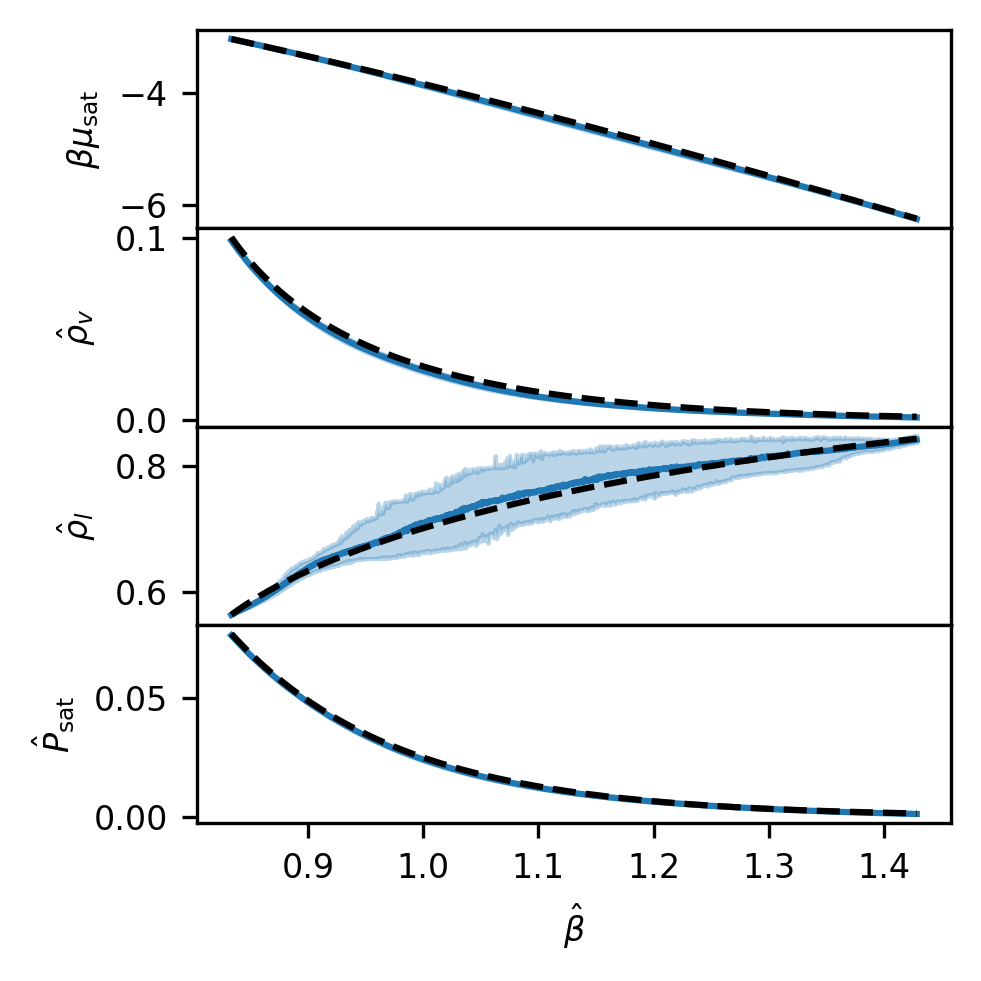

In [7]:
# Load saturation properties
# Should be lnz, density_gas, density_liquid, pressure_gas, pressure_liquid
sat_props = np.load(
    os.path.expanduser("~/GPR_Extrapolation/LJ_EOS/lnPi/sat_props_GPR.npz")
)
gp_sat_props = sat_props["props"]
gp_sat_props_conf_ints = sat_props["conf_ints"]

# Plot true values versus predicted properties
prop_betas = 1.0 / np.linspace(0.7, 1.2, 1000)

fig, ax = plt.subplots(
    gp_sat_props.shape[1] - 1, sharex=True, sharey=False, figsize=(3.37, 3.37), dpi=300
)

for i, prop in enumerate([raw_lnz, raw_dens[:, 0], raw_dens[:, 1], raw_psat]):
    ax[i].plot(prop_betas, gp_sat_props[:, i], color="tab:blue")
    ax[i].fill_between(
        prop_betas,
        gp_sat_props_conf_ints[:, 0, i],
        gp_sat_props_conf_ints[:, 1, i],
        color="tab:blue",
        alpha=0.3,
    )
    ax[i].plot(raw_beta, prop, "k--")
    ax[i].tick_params(axis="both", labelsize=8)

ax[-1].set_xlabel(r"$\hat{\beta}$", fontsize=8)
ax[0].set_ylabel(r"$\beta \mu_\mathrm{sat}$", fontsize=8)
ax[1].set_ylabel(r"$\hat{\rho}_v$", fontsize=8)
ax[2].set_ylabel(r"$\hat{\rho}_l$", fontsize=8)
ax[3].set_ylabel(r"$\hat{P}_\mathrm{sat}$", fontsize=8)

fig.tight_layout()
fig.subplots_adjust(hspace=0.0)

plt.show()